In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
# path = "Results/gecco_min_gen/mask_testing_2/gecco_nhead_4_mask_1_options_all_lr_0.0001_h_m_feats/gecco/"  #nll
path = "Results/energy_inj/testing_feats/energy_nhead_4_mask_1_options_all_50_epoch/energy/"  #mse
preds = np.load(path+'trans-mse-ar_pred_mu.npy')
inputs = np.load(path+'inputs.npy')
trues = np.load(path+'targets.npy')
print(preds.shape, trues.shape, inputs.shape)
print("mse : ",mean_squared_error(trues.squeeze(),preds.squeeze()),"mae: ",mean_absolute_error(trues.squeeze(),preds.squeeze()))

(91, 168, 1) (91, 168, 1) (91, 168, 1)
mse :  8679.594 mae:  54.55989


<ipython-input-6-d69f9c5b992a>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


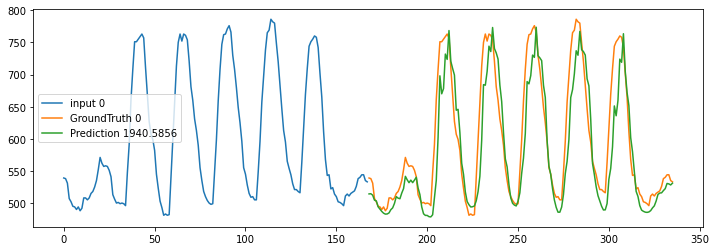

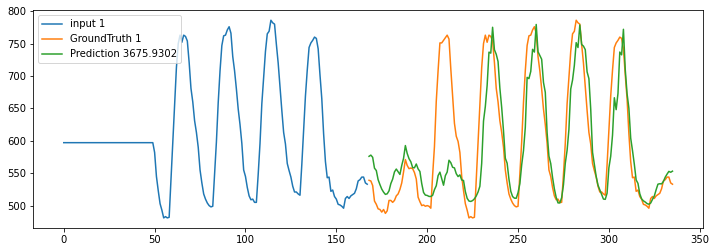

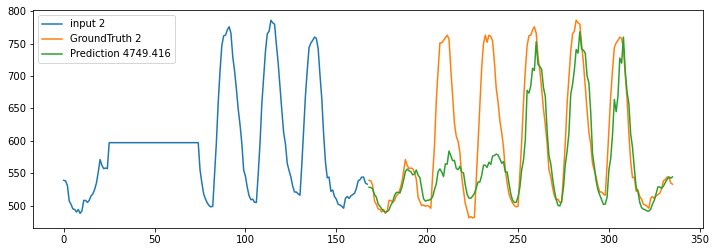

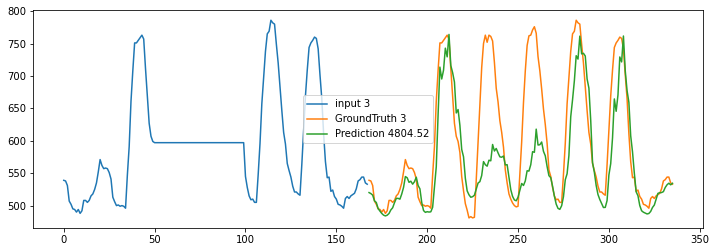

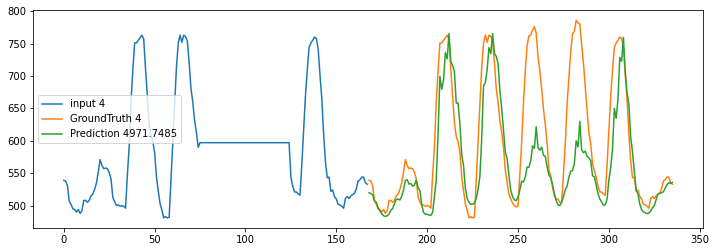

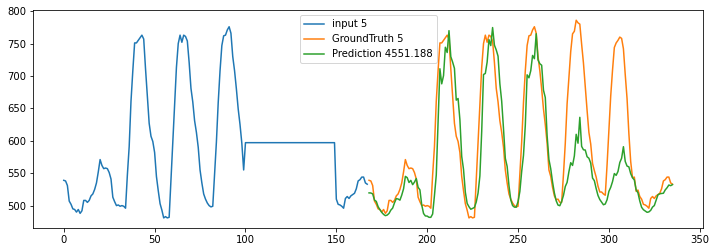

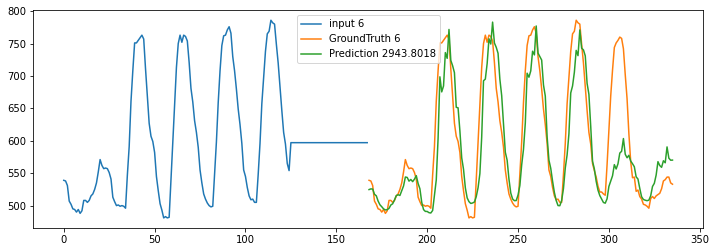

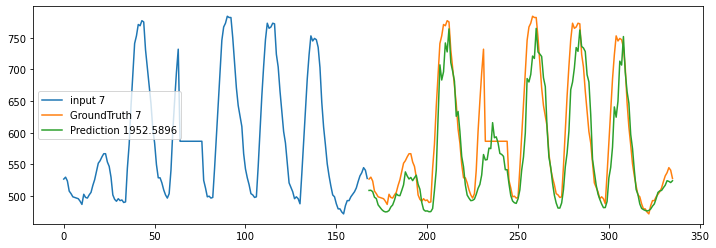

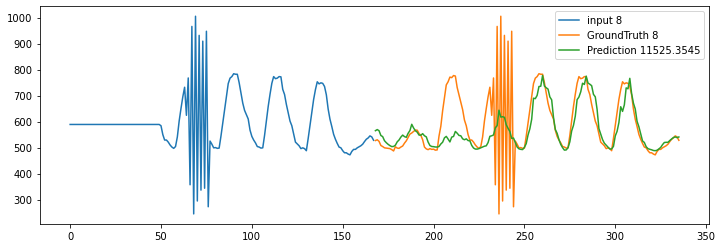

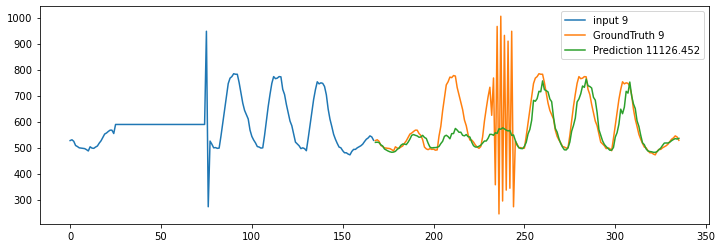

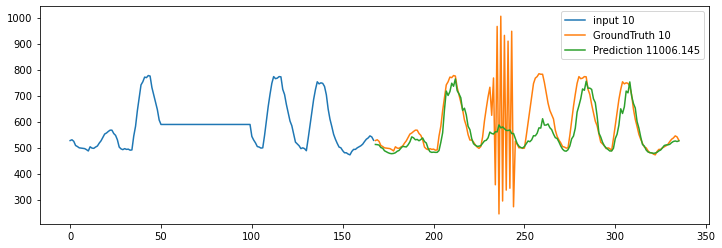

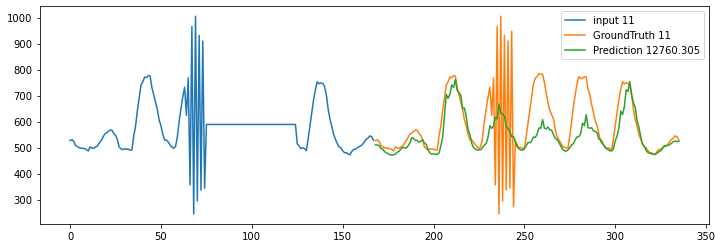

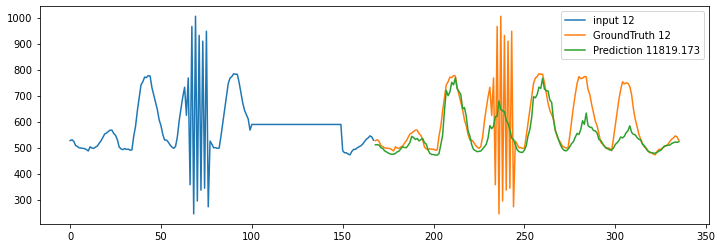

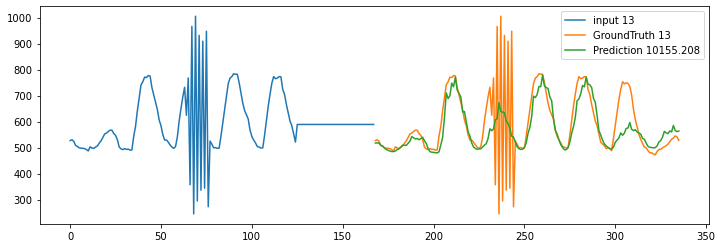

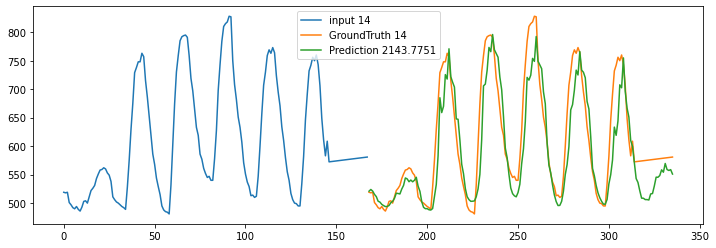

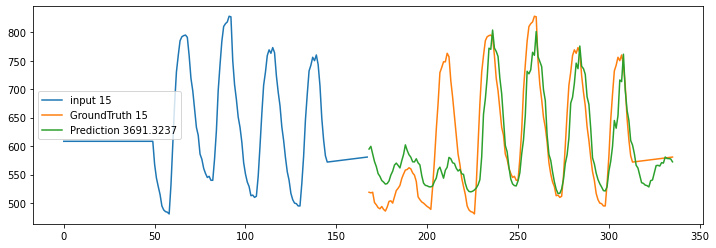

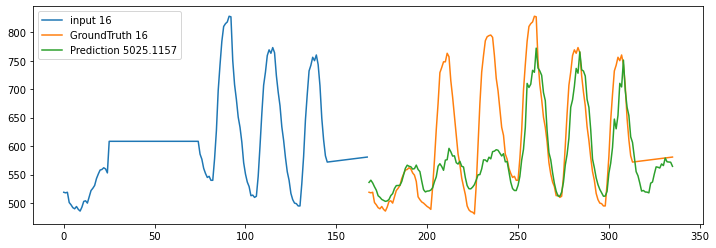

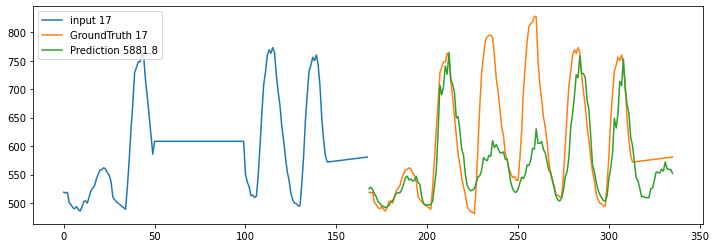

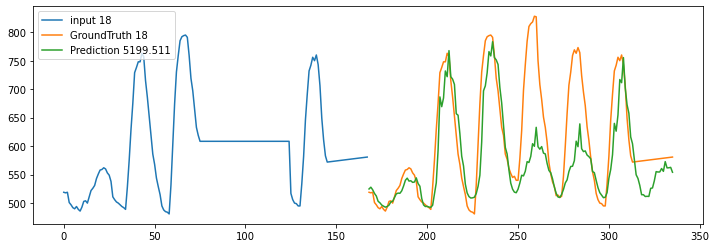

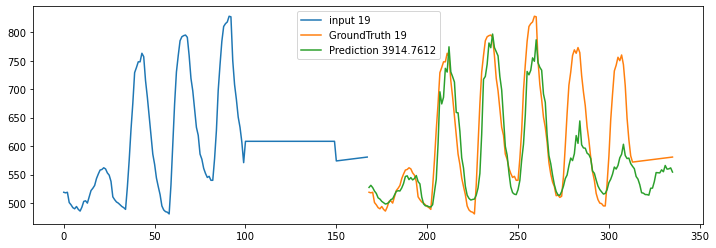

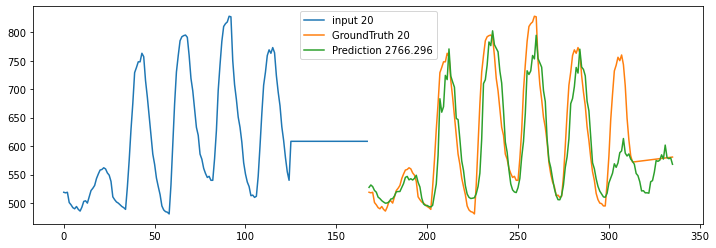

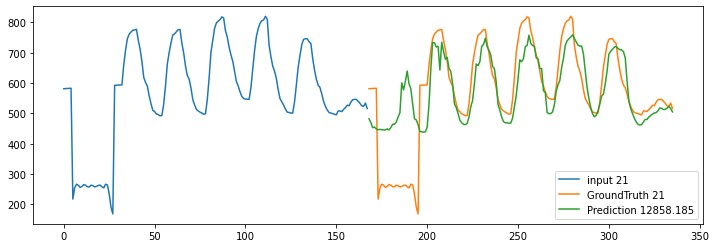

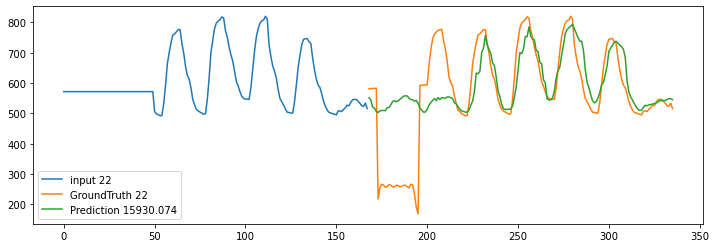

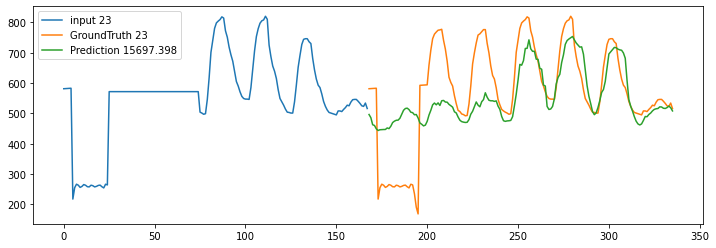

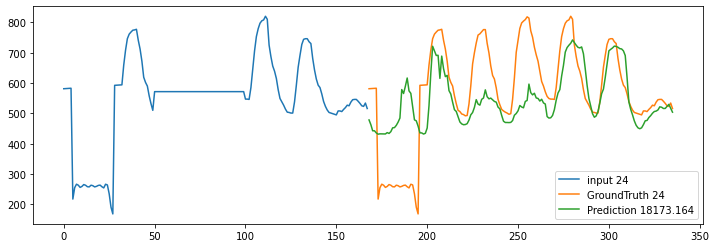

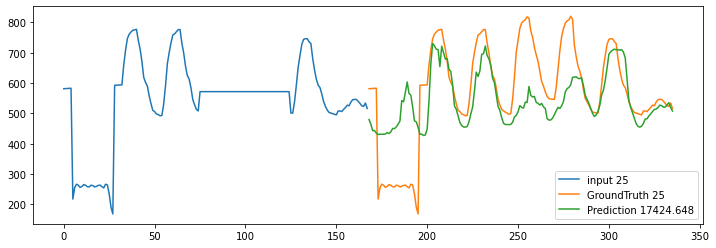

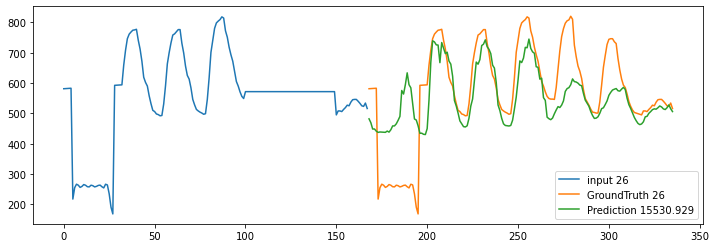

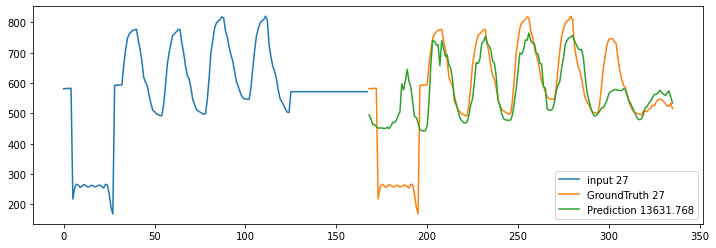

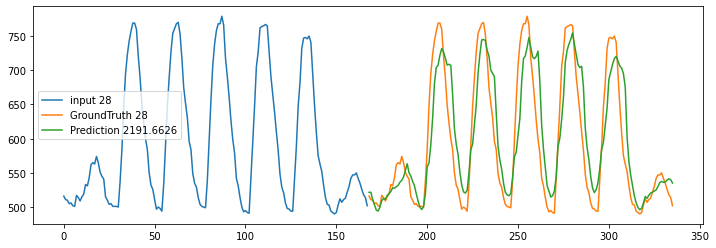

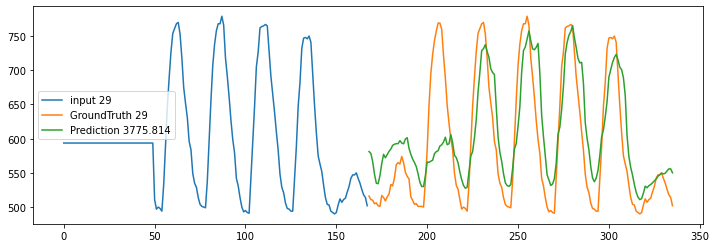

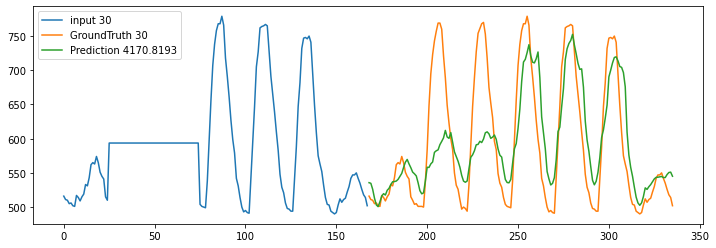

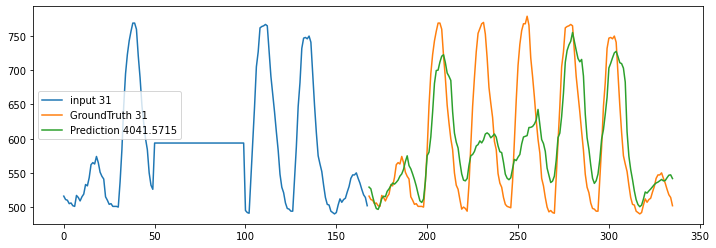

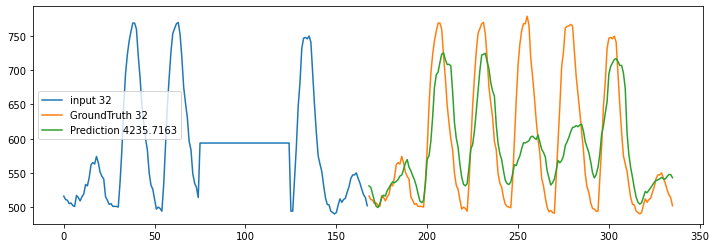

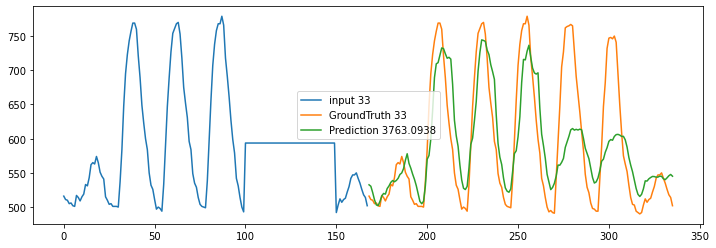

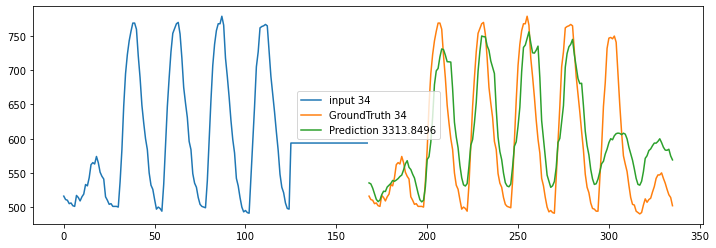

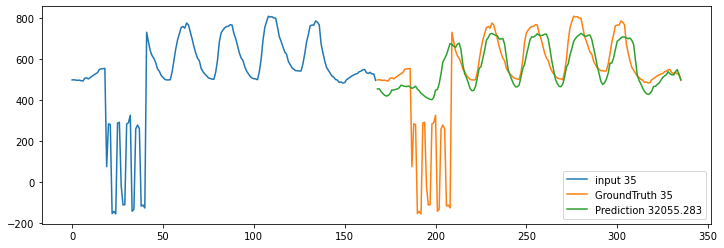

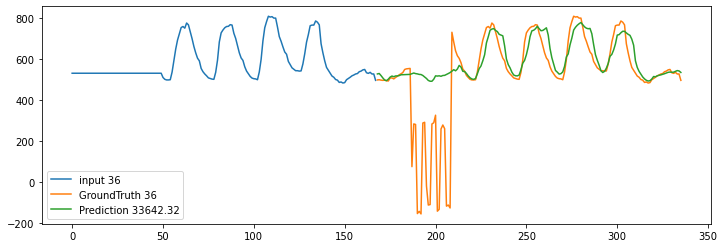

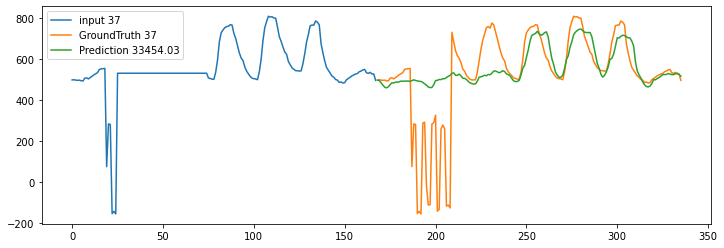

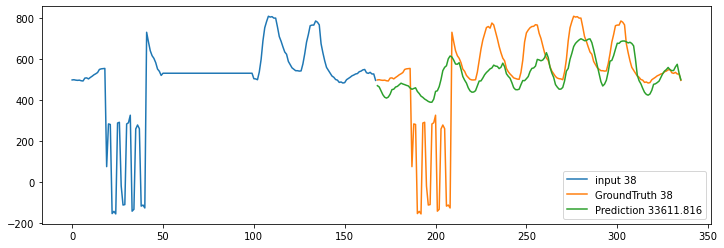

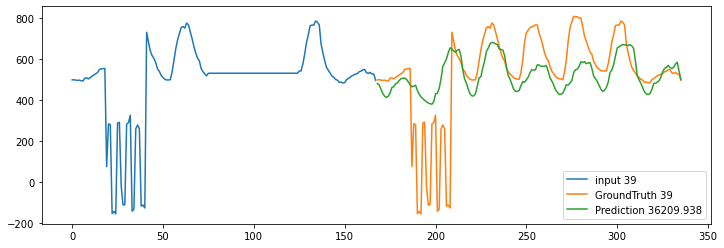

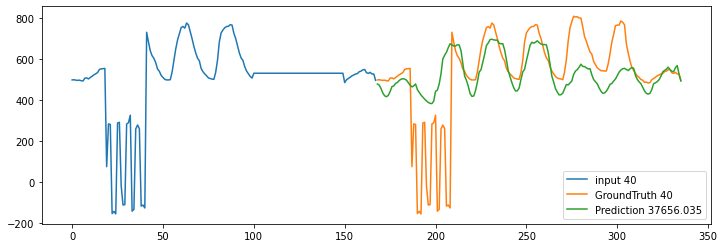

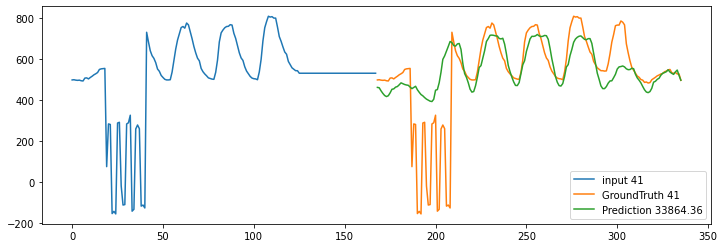

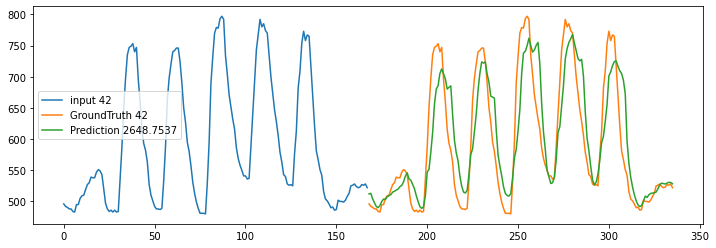

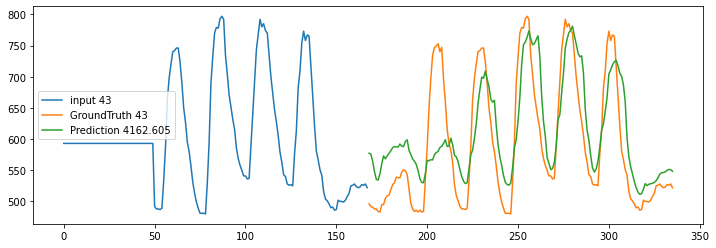

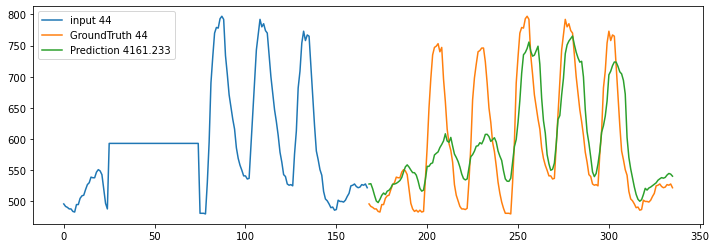

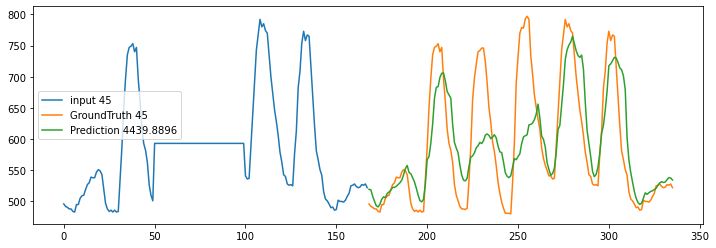

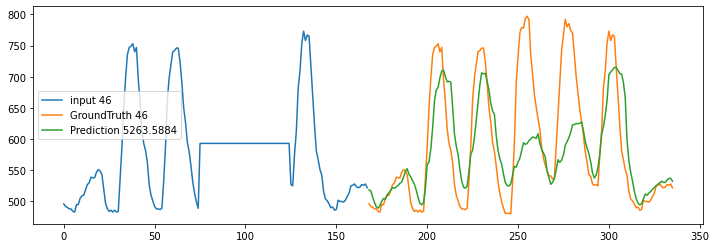

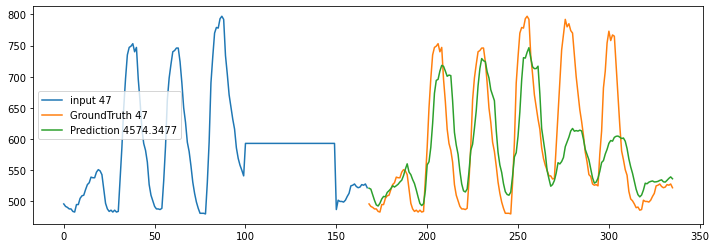

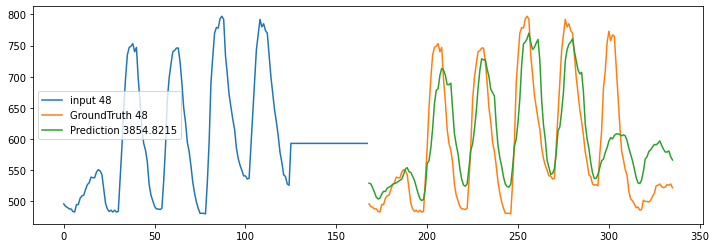

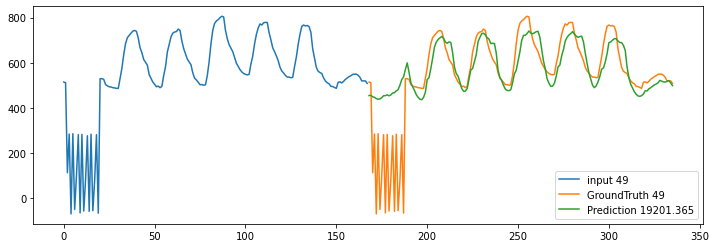

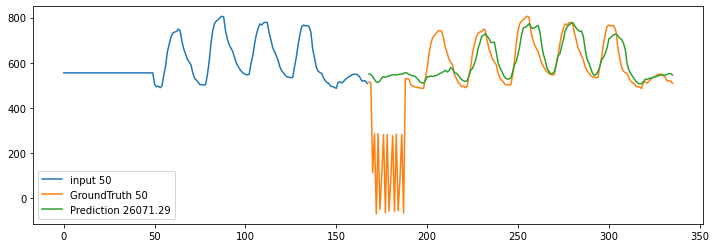

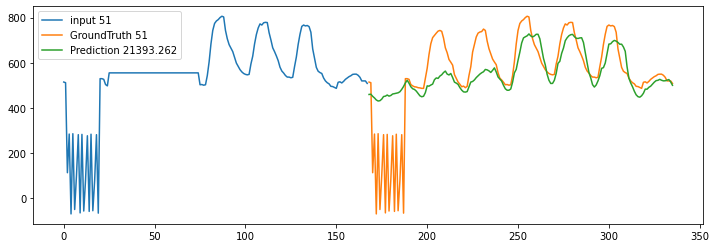

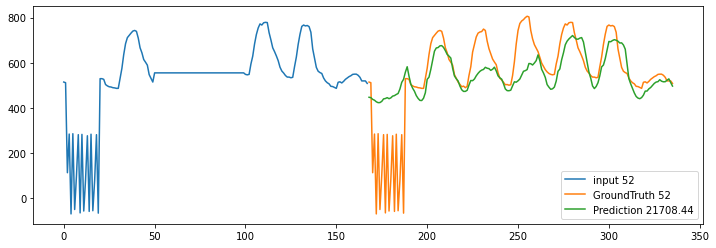

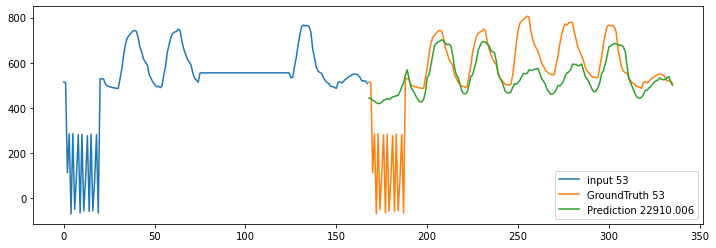

In [6]:
plt.rcParams['figure.figsize'] = (12,4)
x = np.arange(inputs.shape[1]+preds.shape[1])
a = inputs.shape[1]

for i in range(54):
    plt.figure()
    c =i 
    plt.plot(x[:a],inputs[c],label='input '+str(c))
    plt.plot(x[a:],trues[c,:,0], label='GroundTruth '+str(c))
    #for i in range(1):

    plt.plot(x[a:],preds[c,:,0], label='Prediction '+str(mean_squared_error(preds[c,:,0],trues[c,:,0])))
    
    plt.legend()
    # fig = plt.figure()
    # plt.savefig("images/trans-mse_test_"+str(i)+".png")
    
    # plt.show()

In [13]:
a = preds.shape
N_input = a[1]
x = len( range(0,N_input-25,25))+1
print(x)
pred = preds.reshape(-1,x,N_input)
inp = inputs.reshape(-1,x,N_input)
true = trues.reshape(-1,x,N_input)

print(pred.shape)
result = []
for i in range(len(pred)):
    mse = []
    for j,p in enumerate(pred[i]):
        mse.append(mean_squared_error(inp[i,j],p))
    result.append(mse)
result = np.array(result)
threshold = 0.8
score = []
for line in result:
    mini = min(line[1:])
    score.append((line[0]-mini)/line[0])
    print(mini,line[0])


# print(result)
argmin = np.argmin(result,axis=1)
argmin = [0 if np.array(score[i])<threshold else argmin[i] for i in range(len(argmin))]
# print(result)
print(argmin)
new_pred = np.array([pred[i,argmin[i]] if argmin[i]!=0 else true[i,argmin[i]] for i in range(pred.shape[0])])
new_true = np.array([true[i,argmin[i]] for i in range(pred.shape[0])])
print(new_pred.shape,new_true.shape)
print("mse : ",mean_squared_error(new_true.squeeze(),new_pred.squeeze()))

7
(13, 7, 168)
1865.8291 1940.5856
1844.7009 1952.5896
1920.1084 2143.7751
2484.5361 12858.185
1629.9766 2191.6626
2199.6692 32055.283
1911.2059 2648.7537
1980.1151 19201.361
456.41656 897.53076
2264.9622 2885.5698
1992.7916 2833.8018
2087.4253 2606.248
1174.2126 1536.008


TypeError: 'int' object is not iterable

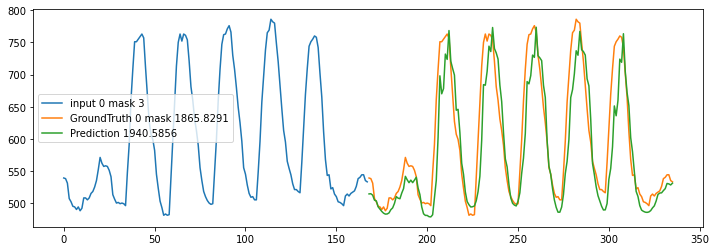

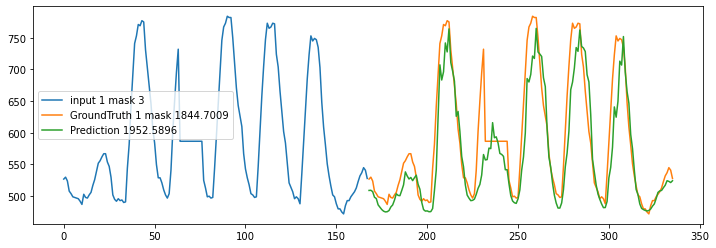

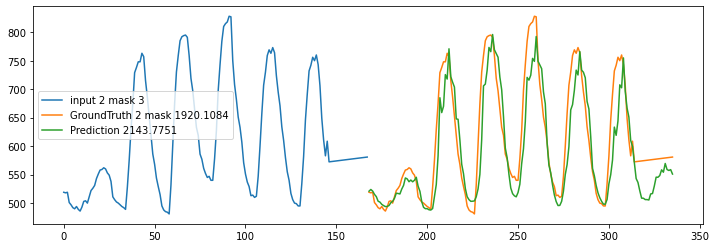

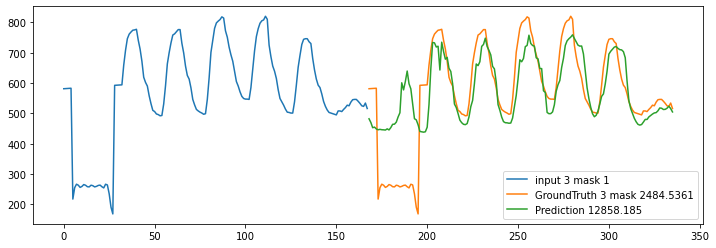

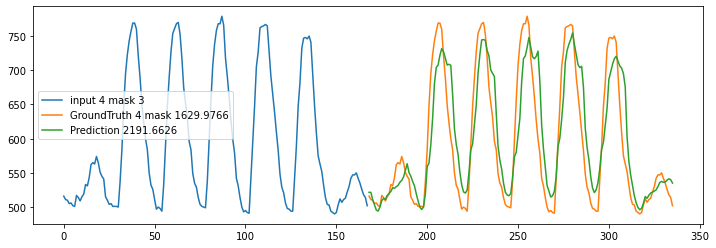

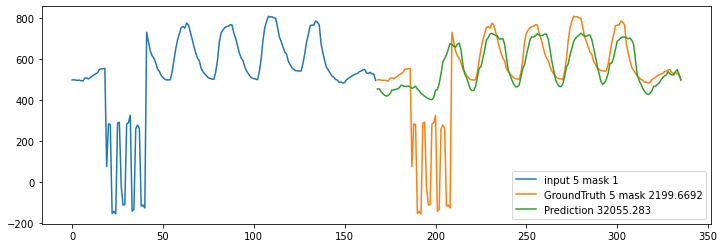

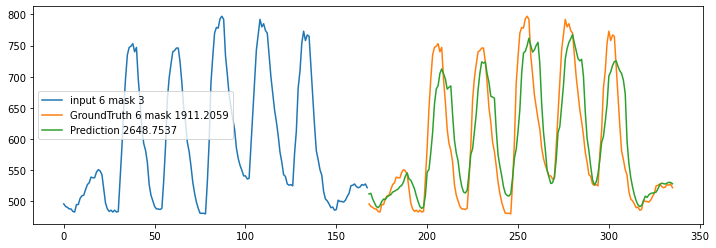

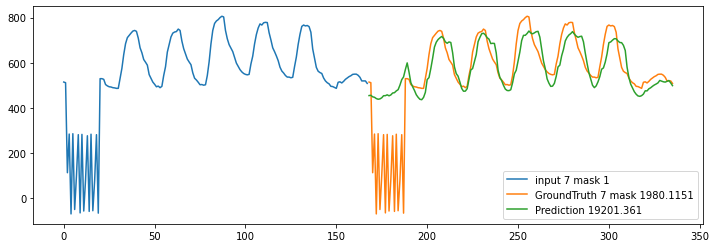

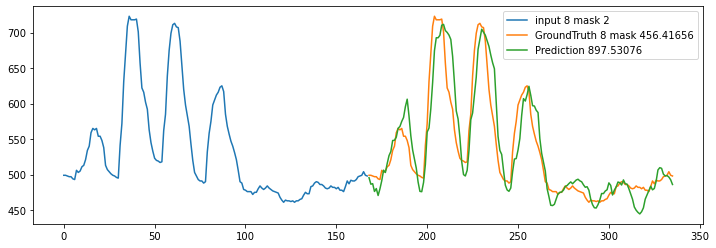

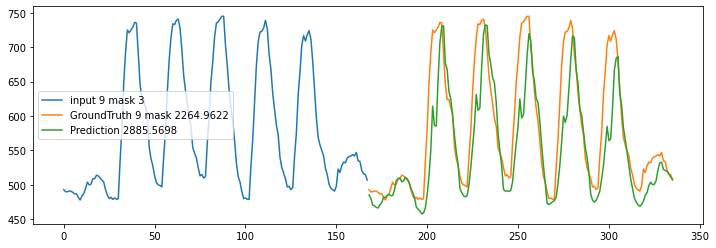

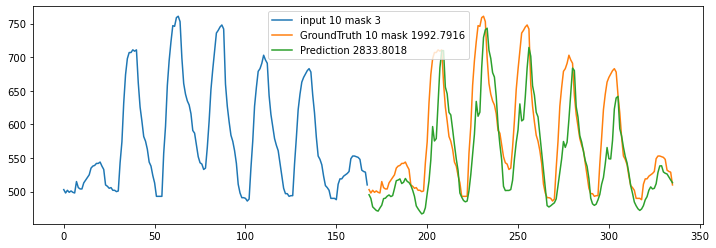

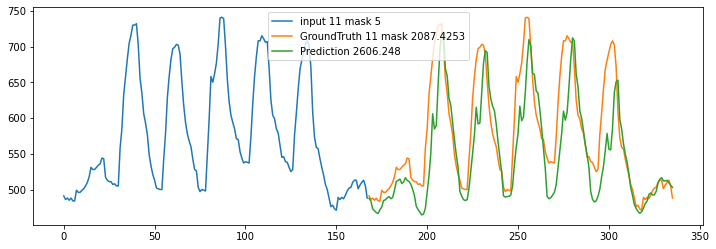

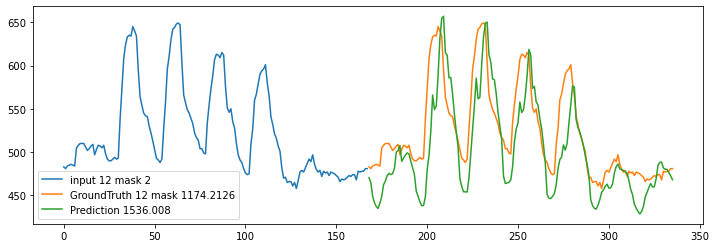

In [8]:
plt.rcParams['figure.figsize'] = (12,4)
x = np.arange(inputs.shape[1]+preds.shape[1])
a = inputs.shape[1]
i = 7
for c in range(new_pred.shape[0]):
    plt.figure()
    plt.plot(x[:a],inputs[c*i],label='input '+str(c)+" mask "+str(argmin[c]))
    plt.plot(x[a:],trues[c*i,:,0], label='GroundTruth '+str(c)+" mask "+str(mean_squared_error(preds[c*i+argmin[c],:,0],inputs[c*i+argmin[c],:,0])))
    plt.plot(x[a:],preds[c*i,:,0], label='Prediction '+str(mean_squared_error(preds[c*i,:,0],inputs[c*i,:,0])))
    plt.legend()

In [22]:
data_mask_test = []
index = range(0,N_input-25,25)
for j in range(new_pred.shape[0]):
    mask = np.zeros(N_input)
    k = argmin[j]-1
    if k>=0:
        mask[index[k]:index[k]+50]=1
    data_mask_test.append(mask)
    # set_trace()
print(np.array(data_mask_test).shape)
# print(data_mask_test)


(13, 168)


In [2]:
DATA_DIRS = '/mnt/cat/data/sandy/Forecasting/'
# np.save(DATA_DIRS+"data/energy-anomaly-detection/energy_inj_mask.npy",np.array(data_mask_test).reshape(-1,))

In [ ]:
for i,x in enumerate(np.array(data_mask_test)):
    plt.plot(x*1000)
    plt.plot(trues[i*14])
    plt.show()

In [29]:
import pandas as pd 
import os
plt.rcParams['figure.figsize']=(20,5)
DATA_DIRS = '/mnt/cat/data/sandy/Forecasting/'
df_inject   = pd.read_csv(
    os.path.join(DATA_DIRS, 'data', 'electricity_load_forecasting_panama', '2_percent_electricity.csv')
)
# df_mask   = pd.read_csv(
#     os.path.join('.', 'data', 'masked.csv')
# )


# test_data = np.load(os.path.join(DATA_DIRS,"Outliers","Outlier","test_data.npy"))
# test_l = len(test_data)

data_inj = df_inject[['nat_demand']].to_numpy()
data_mask = df_inject[['label']].to_numpy()

# data_inj = data
#n = data.shape[1]
n = (1903 + 1) * 24 # Select first n=1904*24 entries because of non-stationarity in the data after first n values
data_inj = data_inj[:, :n]
data_mask = data_mask[:, :n]
N_output = 336
units = n//N_output
dev_len = int(0.2*units) * N_output
test_len = int(0.2*units) * N_output
train_len = n - dev_len - test_len

In [30]:
dd = np.array([i[0] for i in true])
dd.shape

(27, 336)

AttributeError: 'list' object has no attribute 'reshape'

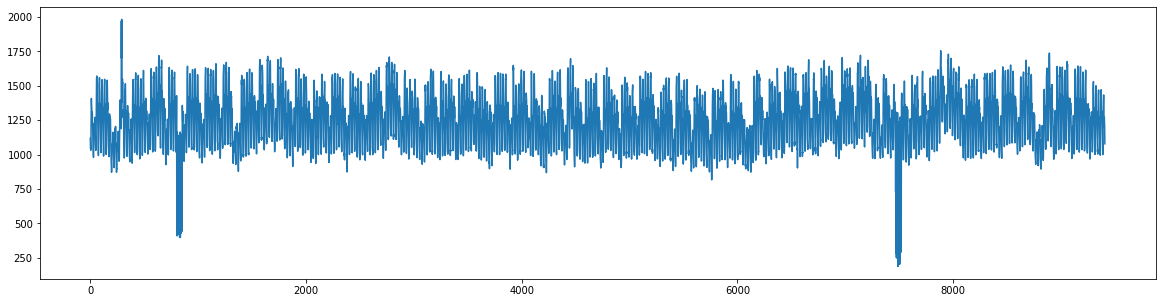

In [32]:
plt.plot(data_inj[train_len+dev_len-N_output:])
plt.plot(np.array(data_mask_test).reshape(-1,))
plt.show()

In [6]:
preds = np.expand_dims(new_pred,-1)
trues = np.expand_dims(new_true,-1)
inputs = new_true

In [ ]:
plt.rcParams['figure.figsize'] = (12,4)
for i in range(54):
    plt.figure()
    c =i 
    x = np.arange(336)
    a = 168
    plt.plot(x[:a],inputs[c],label='input '+str(c))
    plt.plot(x[a:],trues[c,:,0], label='GroundTruth '+str(c))
    #for i in range(1):

    plt.plot(x[a:],preds[c,:,0], label='Prediction '+str(mean_squared_error(trues[c,:,0],preds[c,:,0])))
    
    plt.legend()
    # fig = plt.figure()
    # plt.savefig("images/trans-mse_test_"+str(i)+".png")
    
    # plt.show()

In [9]:
import pandas as pd
import plotly.express as px
df = pd.read_csv(DATA_DIRS+'data/water_quality/gecco2018.csv')

df = df[40000:80000]

data = df[['pH']].to_numpy()
df['EVENT'] = df['EVENT'].map({False:0, True: 1})
data_mask = df[['EVENT']].to_numpy().T

In [16]:
df[df['pH'].isna()]

Empty DataFrame
Columns: [Unnamed: 0, Time, Tp, Cl, pH, Redox, Leit, Trueb, Cl_2, Fm, Fm_2, EVENT]
Index: []

In [10]:
px.line(data)